<a href="https://colab.research.google.com/github/jorgewellison/classifiers-tcc/blob/main/%C3%81rvore-de-decis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Configurações iniciais**

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Importação das bibliotecas**

In [2]:
import pandas as pd
from numpy import mean
from numpy import std
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, export
from sklearn.model_selection import KFold
from yellowbrick.classifier import ConfusionMatrix
import graphviz
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score, cross_val_predict


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.tree.export module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


**Importando previsores e classe (tratados no pré-processamento)**

previsores -> variáveis independentes - X

classe -> variável dependente - y

In [5]:
previsores = pd.read_csv("/content/drive/My Drive/Colab Notebooks/covid-idhm/previsores.csv") 
classe_inc = pd.read_csv("/content/drive/My Drive/Colab Notebooks/covid-idhm/classe_inc.csv") 
classe_mort = pd.read_csv("/content/drive/My Drive/Colab Notebooks/covid-idhm/classe_mort.csv") 


In [6]:
previsores.isnull().sum()

expec_vida                   0
taxa_fecund                  0
MORT1                        0
%sobreviver_60a              0
taxa_envelh                  0
                            ..
IDHM                         0
IDHM_E                       0
IDHM_L                       0
IDHM_R                       0
estimated_population_2019    0
Length: 68, dtype: int64

**Criação do KFold com 10 iterações e Shuffle para embaralhar as linhas, desagrupando os municipios de seus estados**

---



In [7]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)

**Criação e treinamento do modelo**

In [8]:
arvore_inc = DecisionTreeClassifier()
arvore_inc.fit(previsores, classe_inc)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
arvore_mort = DecisionTreeClassifier()
arvore_mort.fit(previsores, classe_mort)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Teste com validação cruzada**

In [11]:
#a função cross_val_score recebe por parâmetro o modelo
#todos os dados para treino, os dados de classes, a quandidade de fodls e o metodo de avaliação

scores = cross_val_score(arvore_inc, previsores, classe_inc, cv=cv, scoring='accuracy')

In [12]:
#a função cross_val_score recebe por parâmetro o modelo
#todos os dados para treino, os dados de classes, a quandidade de fodls e o metodo de avaliação

scores2 = cross_val_score(arvore_mort, previsores, classe_mort, cv=cv, scoring='accuracy')

**Imprimindo os resultados dos folds**

In [13]:
scores #array com resultado de cada execução (previsão)

array([0.55992844, 0.55277281, 0.5706619 , 0.53309481, 0.60822898,
       0.57602862, 0.5921288 , 0.56887299, 0.58676208, 0.54301075])

In [14]:
scores2 #array com resultado de cada execução (previsão)

array([0.50447227, 0.45796064, 0.47227191, 0.47406082, 0.49373882,
       0.47584973, 0.4686941 , 0.48479428, 0.47763864, 0.48924731])

# **Predição e Matriz de confusão**

### Predição e Matriz da incidência

In [15]:
predictions = cross_val_predict(arvore_inc, previsores, classe_inc, cv=cv)
confusao = confusion_matrix(classe_inc, predictions)
confusao

array([[ 605,  955,  135],
       [ 894, 2515,  170],
       [ 123,  134,   58]])

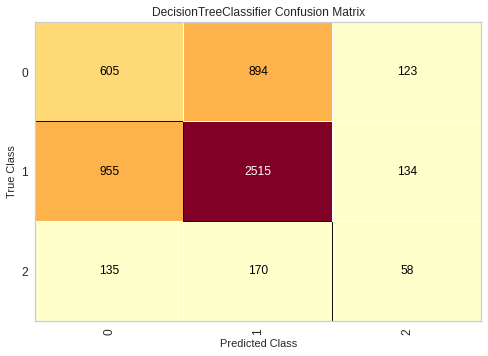

In [17]:
v = ConfusionMatrix(DecisionTreeClassifier())
v.fit(previsores, classe_inc)
v.score(previsores, predictions)
v.poof()

### Predição e Matriz da mortalidade

In [19]:
predictions2 = cross_val_predict(arvore_mort, previsores, classe_mort, cv=cv)
confusao2 = confusion_matrix(classe_mort, predictions)
confusao2

array([[ 691, 2011,  154],
       [ 270,  381,   68],
       [ 661, 1212,  141]])

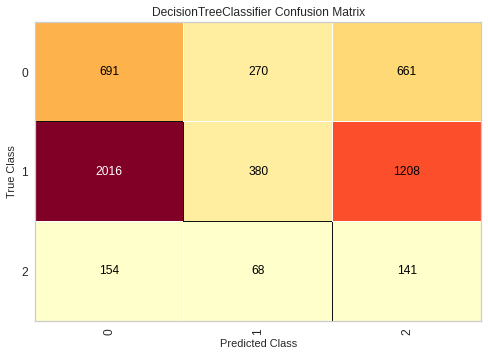

In [20]:
v2 = ConfusionMatrix(DecisionTreeClassifier())
v2.fit(previsores, classe_mort)
v2.score(previsores, predictions)
v2.poof()

**Taxa de acerto**

In [18]:
scores.mean() #méd

0.5691490180237367

In [21]:
scores2.mean()

0.47987285282859177

### **Métricas de avaliação**

In [ ]:
#Acurácia da predição de incidência
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.572 (0.023)


In [22]:
#Acurácia da predição de mortalidade
print('Accuracy: %.3f (%.3f)' % (mean(scores2), std(scores2)))

Accuracy: 0.480 (0.013)


**Taxa de erro**

In [ ]:
#Taxa de erro da predição de incidência
taxa_erro = 1 - scores.mean()
taxa_erro

0.4935749066814771

In [23]:
#Taxa de erro da predição de mortalidade
taxa_erro = 1 - scores2.mean()
taxa_erro

0.5201271471714082

**Exportação da árvore de decisão do algoritmo de treinamento, com o formato .dot para posterior visualização**

In [ ]:
export_graphviz(arvore, 
                out_file = 'tree.dot',
                feature_names = ['expec_vida', 'taxa_fecund','MORT1','%sobreviver_60a','taxa_envelh','expec_anos_estudo_18','T_ANALF11A14','T_ANALF25M','T_ATRASO_0_BASICO','T_ATRASO_2_BASICO','T_FLPRE','T_FLSUPER','T_FREQSUPER1517','T_MED25M','T_SUPER25M','GINI','PIND','PINDCRI','PMPOB','PMPOBCRI','RDPC','CPR','EMP','P_AGRO','P_COM','P_CONSTR','P_EXTR','P_FORMAL','P_FUND','P_MED','P_SERV','P_SIUP','P_SUPER','T_DES2529','TRABCC','TRABPUB','TRABSC','T_AGUA','T_BANAGUA','T_DENS','T_LIXO','T_LUZ','AGUA_ESGOTO','PAREDE','T_CRIFUNDIN_TODOS','T_FORA4A5','T_FORA6A14','T_FUNDIN_TODOS','T_FUNDIN_TODOS_MMEIO','T_FUNDIN18MINF','T_M10A14CF','T_M15A17CF','T_MULCHEFEFIF014','T_NESTUDA_NTRAB_MMEIO','T_OCUPDESLOC_1','T_RMAXIDOSO','T_SLUZ','HOMEMTOT','MULHERTOT','pesoRUR','pesotot','pesourb','POP','IDHM','IDHM_E','IDHM_L','IDHM_R','estimated_population_2019'],
                class_names = ['0', '1', '2'],
                filled = True,
                leaves_parallel=True)